In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/SNA1.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=df.iloc[:,2:4].values  #age and estimated salary  #x=df.iloc[:,[2,3]]
y=df.iloc[:,-1].values   #for last column y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #() helps to make an object

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Model Building based on ensembling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)  #() consists of hyperparameter
model1 = model.fit(X_train,y_train)
model1

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
#we use metrics to get confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[54,  4],
       [ 1, 21]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9375

**NEW DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Heart_Disease.csv')
df

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   Chest Pain Type      303 non-null    int64  
 3   trestbps             303 non-null    int64  
 4   chol                 303 non-null    int64  
 5   fbs                  303 non-null    int64  
 6   cardio_result        303 non-null    int64  
 7   max_heartrate        303 non-null    int64  
 8   exercise_angina      303 non-null    int64  
 9   ST_depression        303 non-null    float64
 10  slope                303 non-null    int64  
 11  no_majorvessel(0-3)  303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.dtypes

age                      int64
sex                      int64
Chest Pain Type          int64
trestbps                 int64
chol                     int64
fbs                      int64
cardio_result            int64
max_heartrate            int64
exercise_angina          int64
ST_depression          float64
slope                    int64
no_majorvessel(0-3)      int64
thal                     int64
target                   int64
dtype: object

In [ ]:
#not able to run this command without raising an error
df=df.drop_duplicates

In [ ]:
# statistical measures about the data
df.describe()

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#ERRORS
# checking the distribution of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

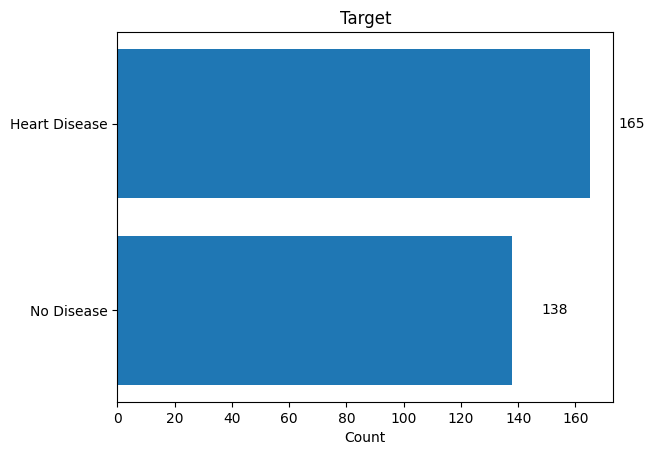

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

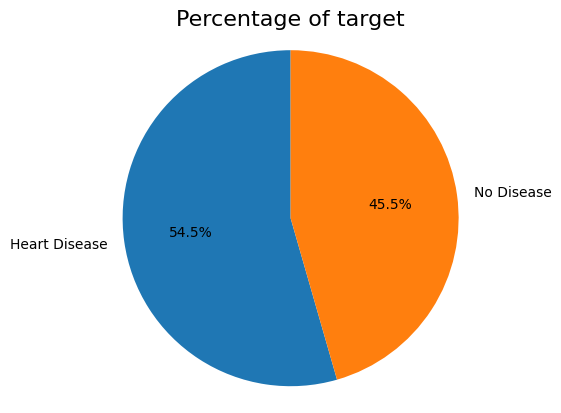

In [ ]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [ ]:
#Alternative way to segregation of x and y as z=x+y and we want x=z-y, thus to drop Y

In [ ]:
qualitative =[]
quantitative=[]
for feature in df.columns:
  if len(df[feature].unique()) <=8:
    qualitative.append(feature)
  else:
    quantitative.append(feature)

In [ ]:
qualitative

['sex',
 'Chest Pain Type ',
 'fbs',
 'cardio_result',
 'exercise_angina',
 'slope',
 'no_majorvessel(0-3)',
 'thal',
 'target']

In [ ]:
quantitative

['age', 'trestbps', 'chol', 'max_heartrate', 'ST_depression']

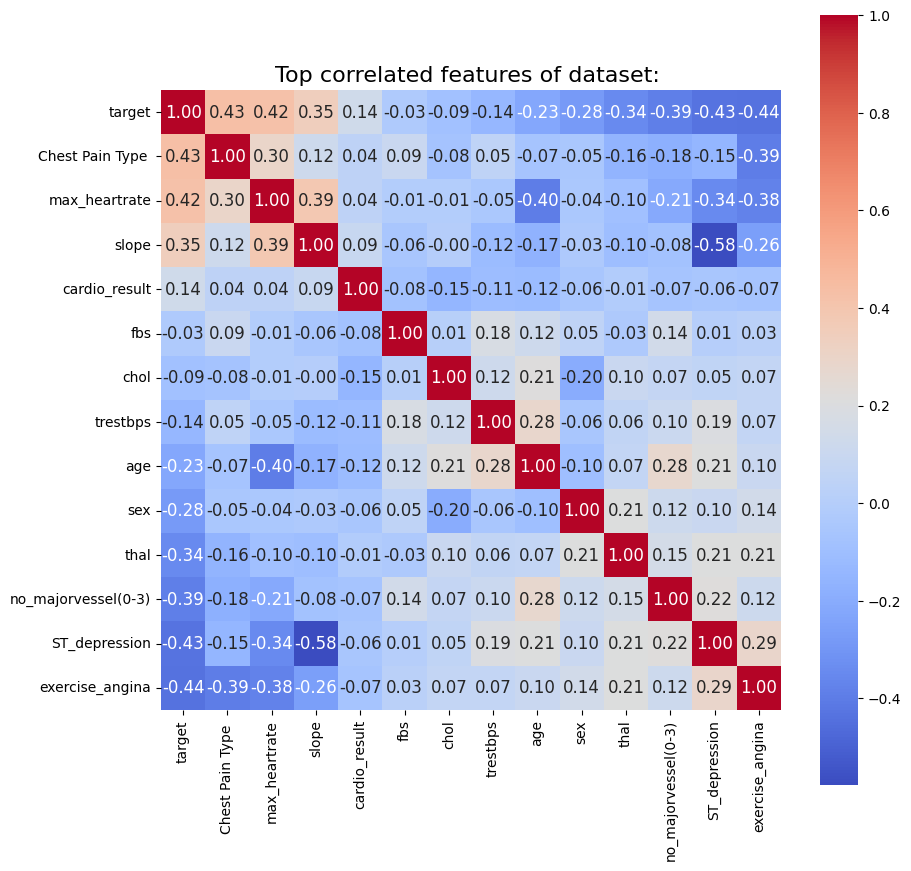

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [ ]:
import seaborn as sns
top=15
corr=df.corr()
top15=corr.nlargest(top,'target')['target'].index
corr_top15=df[top15].corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15,square=True,ax=ax,annot=True,cmap='coolwarm',fmt='.2f',annot_kws={'size':12})
plt.title('Top correlated features of dataset: ',size=16)
plt.show()

"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

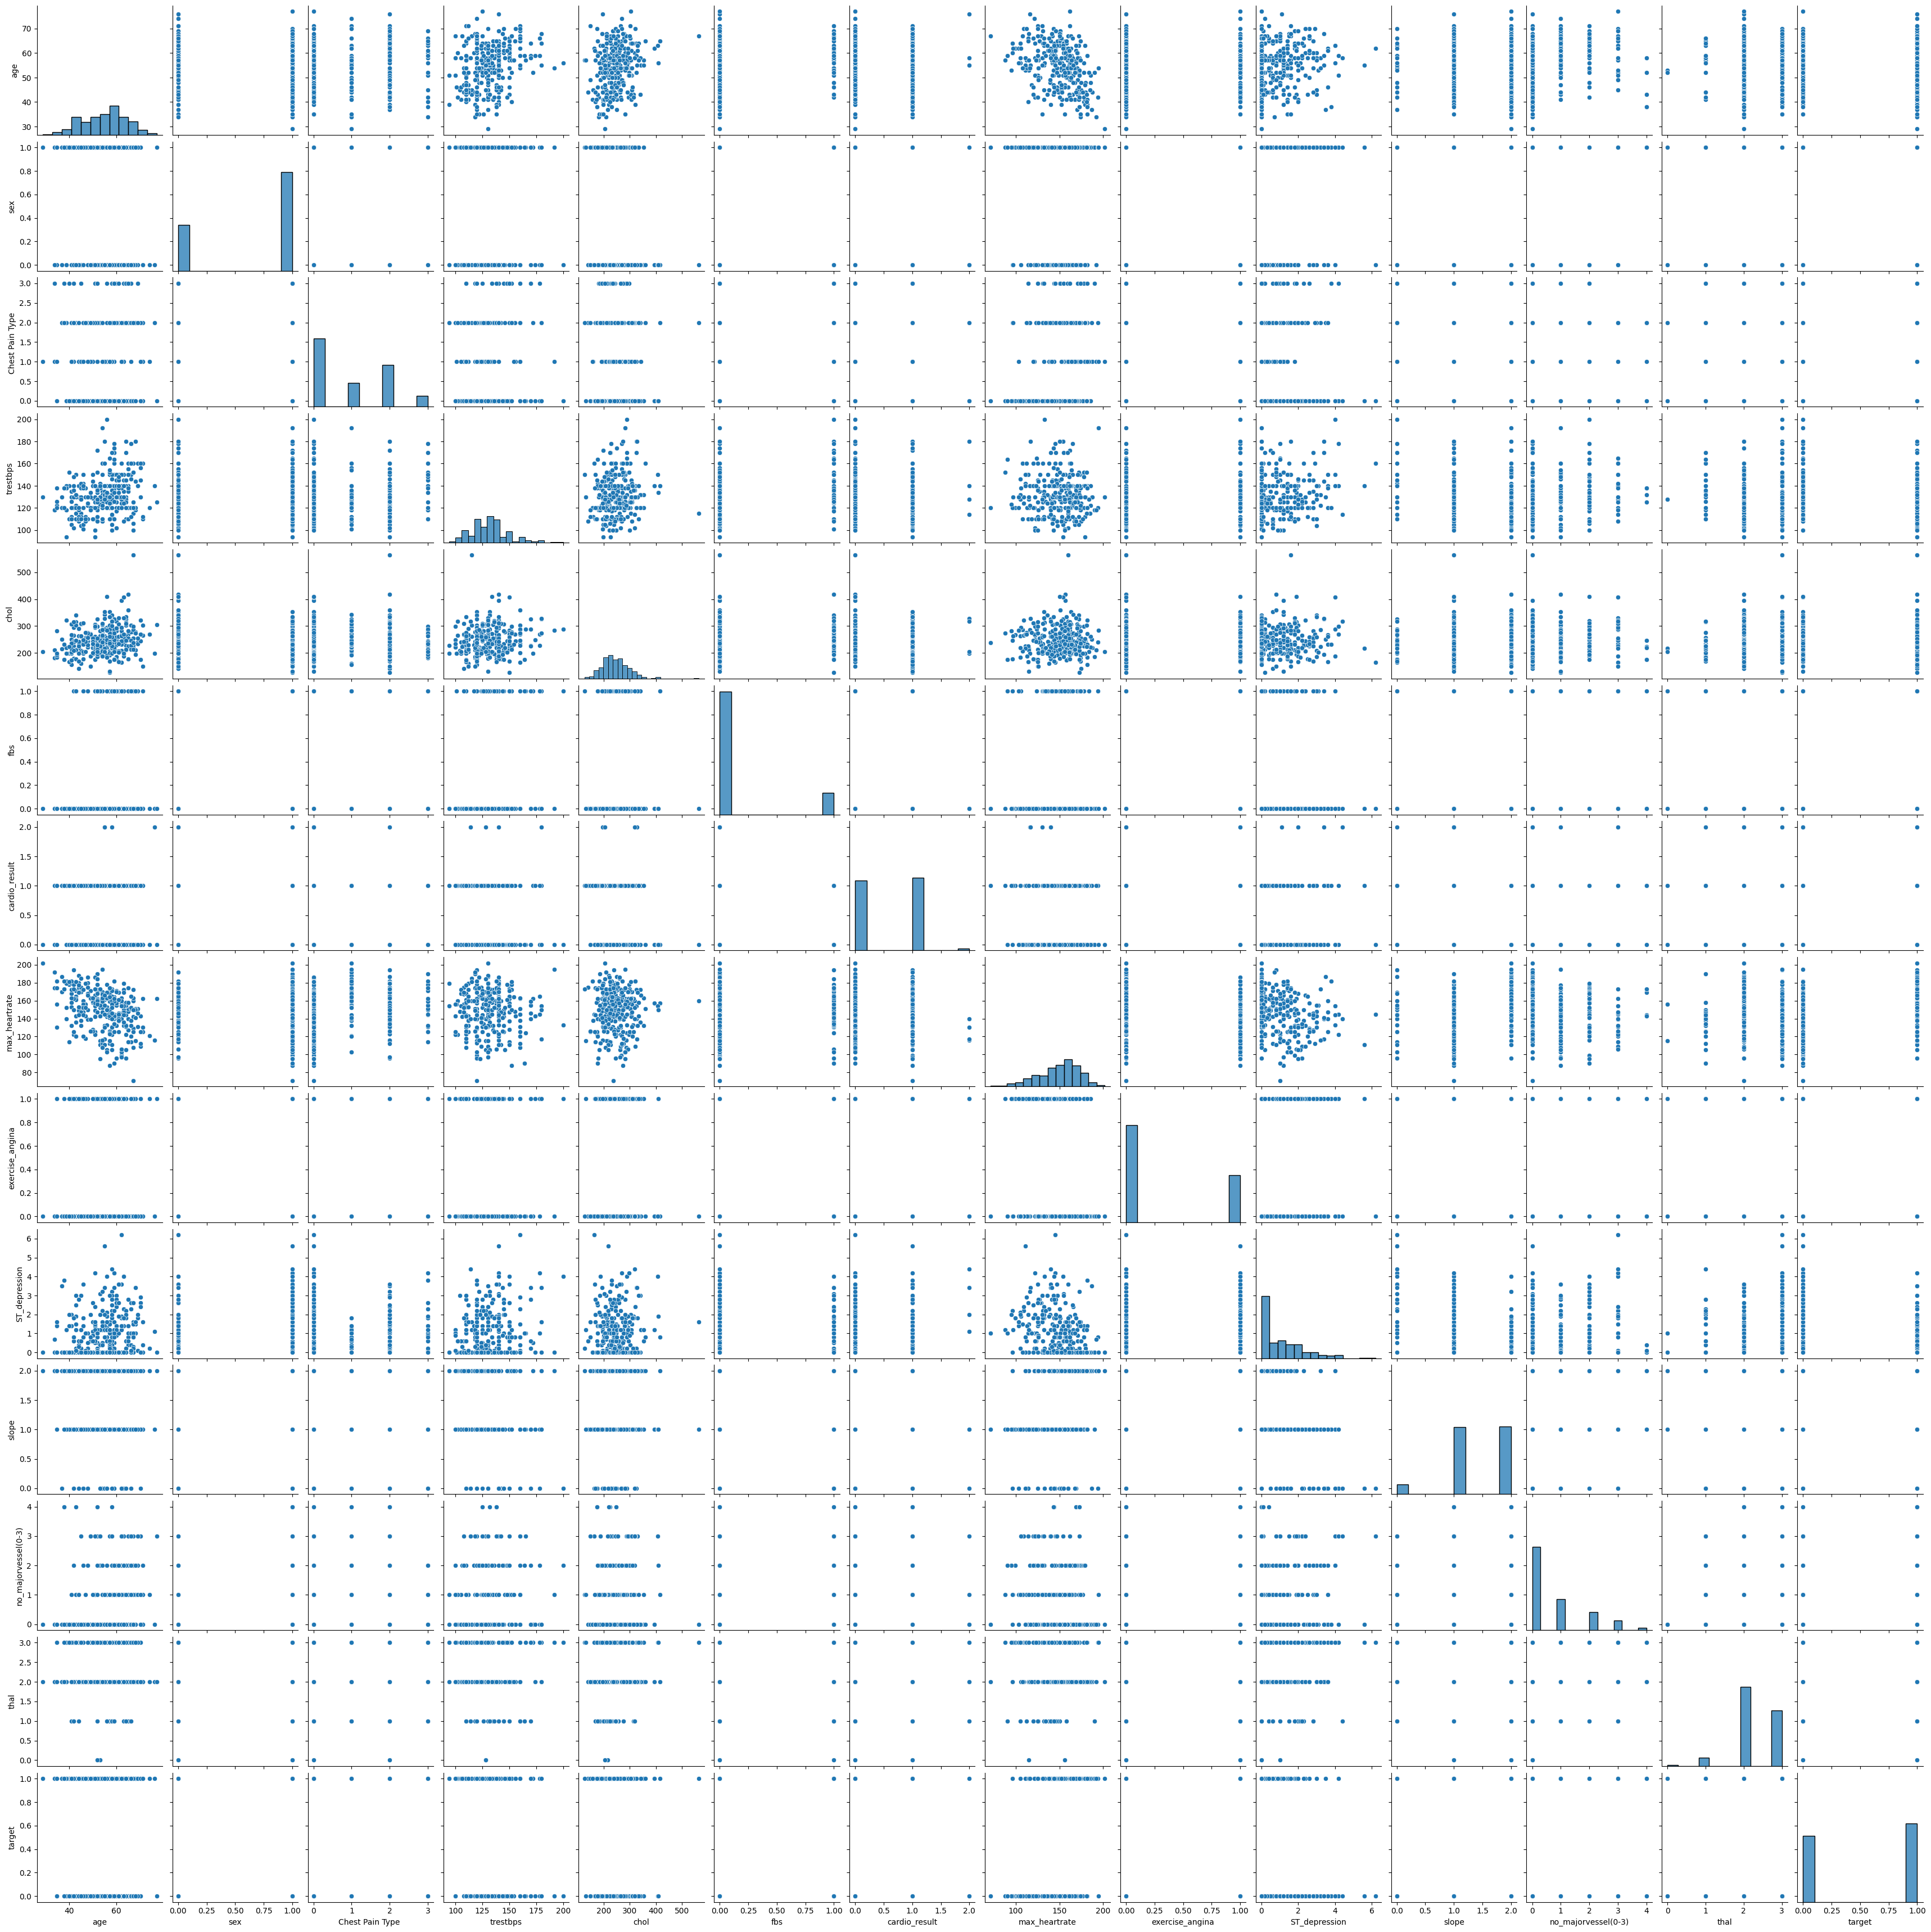

In [ ]:
sns.pairplot(df)

In [ ]:
#Putting Feature Variable to X and Target variable to y.
# Putting feature variable to X
X = df.drop('target',axis=1)
# Putting response variable to y
y = df['target']

In [ ]:
X

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [ ]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))


RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8360655737704918
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.5573770491803278
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



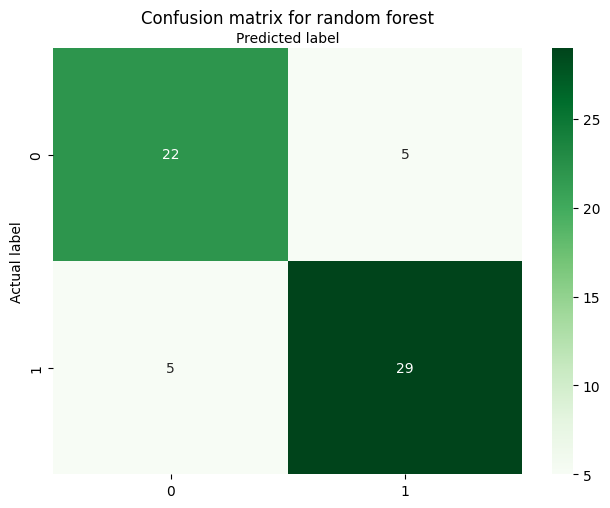

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

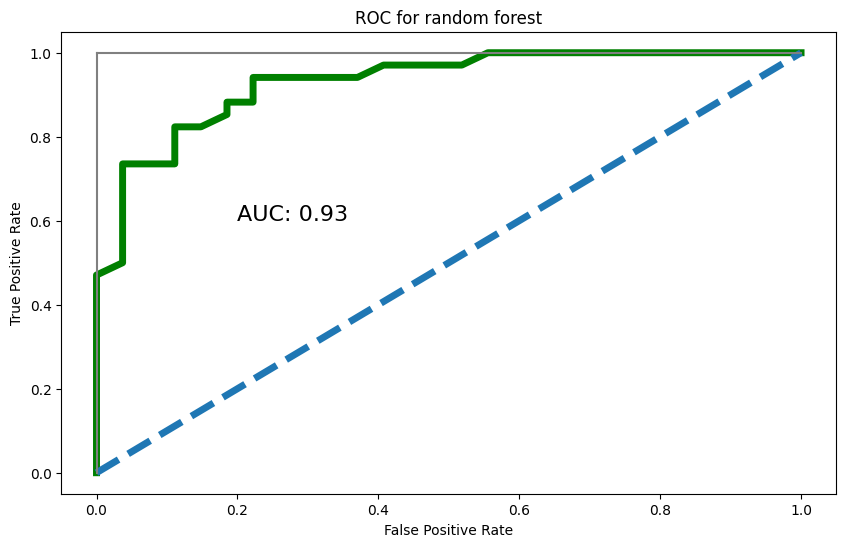

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()